# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [6]:
# Extract all rows of data
table_container = soup.find("table", class_="table")


In [7]:
# header

table_header_container = table_container.find('tr', class_=lambda x: x != 'data-row')

# print(table_header_container)

table_headers = table_container.find_all("th")

# print("")
# print(table_headers)

table_header_list = []

# print("")

for table_header in table_headers:
    header = table_header.get_text()
    # print(header)
    table_header_list.append(header)

print("")
# print(table_header_list)
table_header_list


['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [8]:

table_row_container_list = table_container.find_all("tr", class_="data-row")

print(table_row_container_list)

table_row_list = []

for table_row_container in table_row_container_list:
    columns_for_this_row = table_row_container.find_all("td")
    print("")
    table_column_list = []
    for column in columns_for_this_row:
        column_value = column.get_text()
        print(column_value)
        table_column_list.append(column_value)

    table_row_list.append(table_column_list)

print("")
# print(table_row_list)
table_row_list


[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [9]:
df = pd.DataFrame(table_row_list, columns=table_header_list)

# print(df)
df.head(5)


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [10]:
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [11]:
# # Convert the 'Name' and 'Occupation' columns to the new string dtype
# df['Name'] = df['Name'].astype('string')
# df['Occupation'] = df['Occupation'].astype('string')

# Convert columns to specific data types
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)

df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)


In [15]:
print(df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
header_row_list = []

headers = table_row_headers.find_all("tr", class_="data-row")


data_rows_list = []

# Loop through the scraped data to create a list of rows
for row in table_rows:
    

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names


In [8]:
# Confirm DataFrame was created successfully


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis


In [11]:
# Confirm type changes were successful by examining data types again


id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
month_counts = df['month'].value_counts().sort_index()

print( type(month_counts) )

print(month_counts)


<class 'pandas.core.series.Series'>
month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [12]:
# 1. How many months are there on Mars?


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [13]:
# 2. How many Martian days' worth of data are there?

# days = df.value_counts().length()
# print (days)

# Find all distinct terrestrial_date values and their counts
distinct_dates = df['terrestrial_date'].value_counts()

# Total count of distinct terrestrial_date occurrences
total_count = distinct_dates.sum()

print(total_count)


1867


In [13]:
# 2. How many Martian days' worth of data are there?


1867

In [14]:
# 3. What is the average low temperature by month?

# accumulate all values by month
# take average of the values

# Calculate average min_temp for each distinct month
avg_min_temp_by_month = df.groupby('month')['min_temp'].mean()

avg_min_temp_by_month


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [14]:
# 3. What is the average low temperature by month?


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


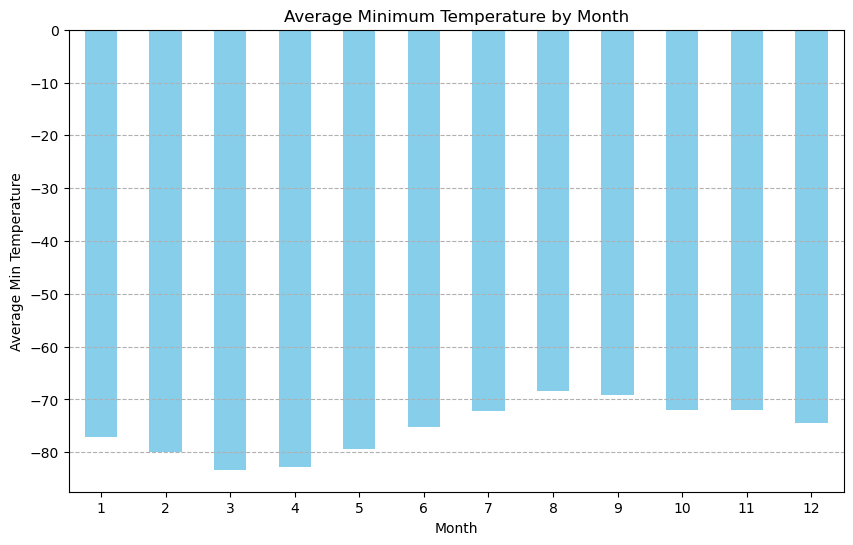

In [15]:
# Plot the average temperature by month
# Plotting
avg_min_temp_by_month.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Minimum Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Min Temperature')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

plt.show()

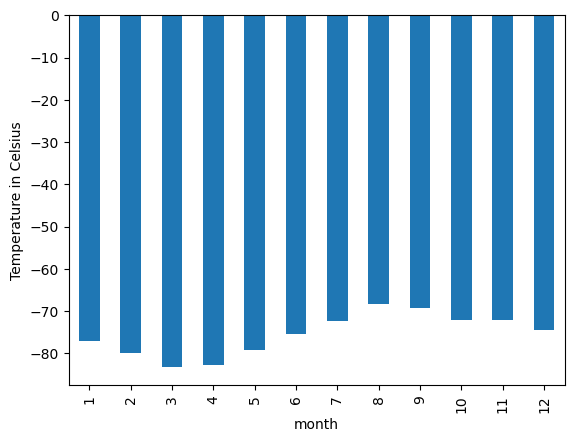

In [15]:
# Plot the average temperature by month


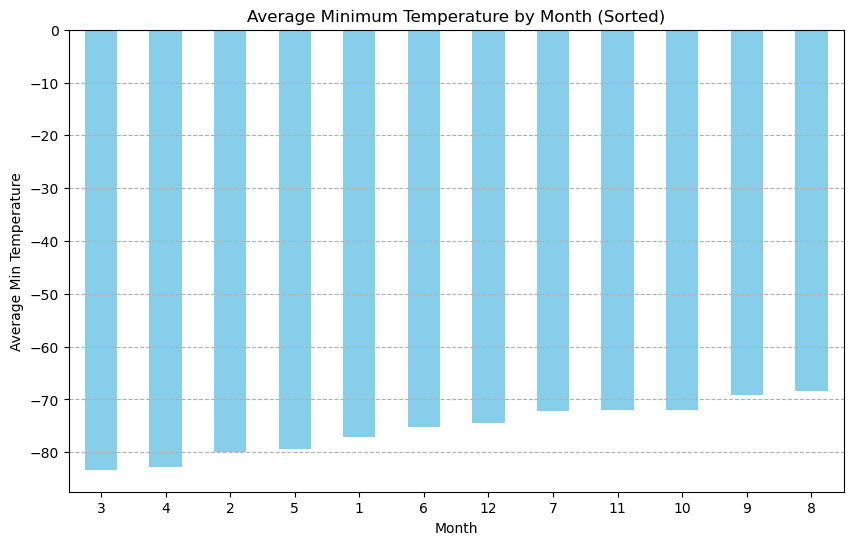

In [16]:
# Identify the coldest and hottest months in Curiosity's location

# # Sort by average min_temp in descending order
# avg_min_temp_by_month_sorted = avg_min_temp_by_month.sort_values(ascending=False)

# Sort by average min_temp in ascending order
avg_min_temp_by_month_sorted = avg_min_temp_by_month.sort_values(ascending=True)

# Plotting
avg_min_temp_by_month_sorted.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Minimum Temperature by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Average Min Temperature')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

plt.show()


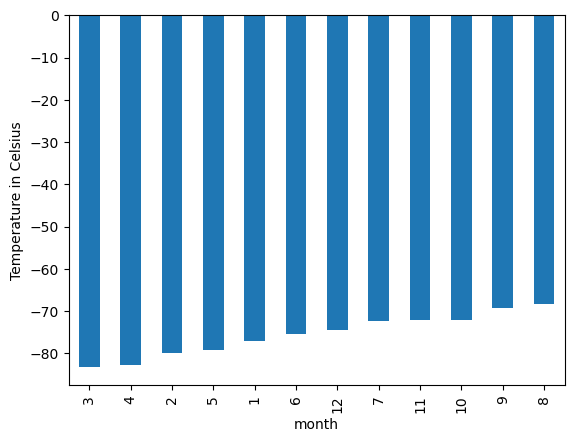

In [16]:
# Identify the coldest and hottest months in Curiosity's location


In [17]:
# 4. Average pressure by Martian month


# Calculate average pressure for each distinct month
avg_pressure_by_month = df.groupby('month')['pressure'].mean()

avg_pressure_by_month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [17]:
# 4. Average pressure by Martian month


month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


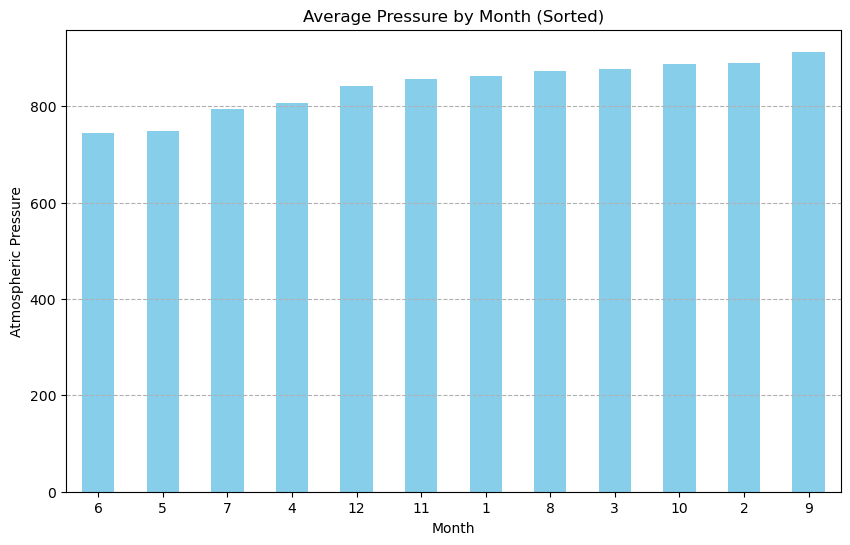

In [18]:
# Plot the average pressure by month


# Sort by average pressure in ascending order
avg_pressure_by_month_sorted = avg_pressure_by_month.sort_values(ascending=True)

# Plotting
avg_pressure_by_month_sorted.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Pressure by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

plt.show()



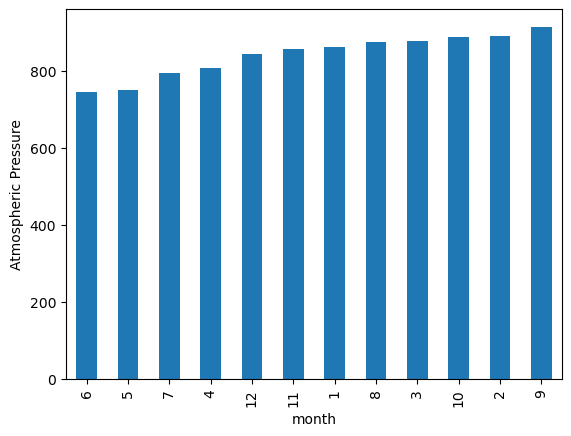

In [18]:
# Plot the average pressure by month


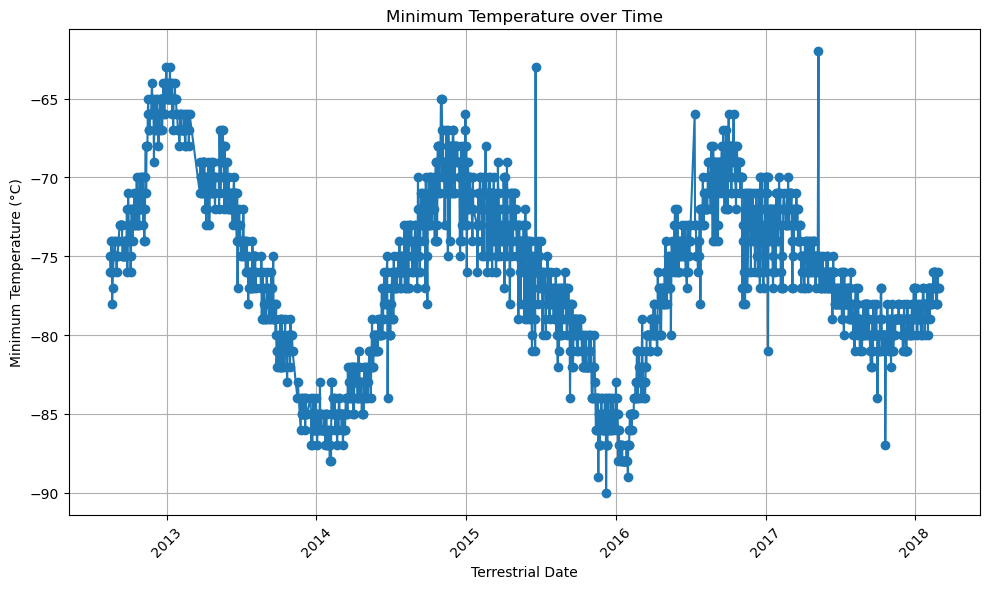

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Sort DataFrame by terrestrial_date
df_sorted = df.sort_values(by='terrestrial_date')

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_sorted['terrestrial_date'], df_sorted['min_temp'], marker='o', linestyle='-')
plt.title('Minimum Temperature over Time')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


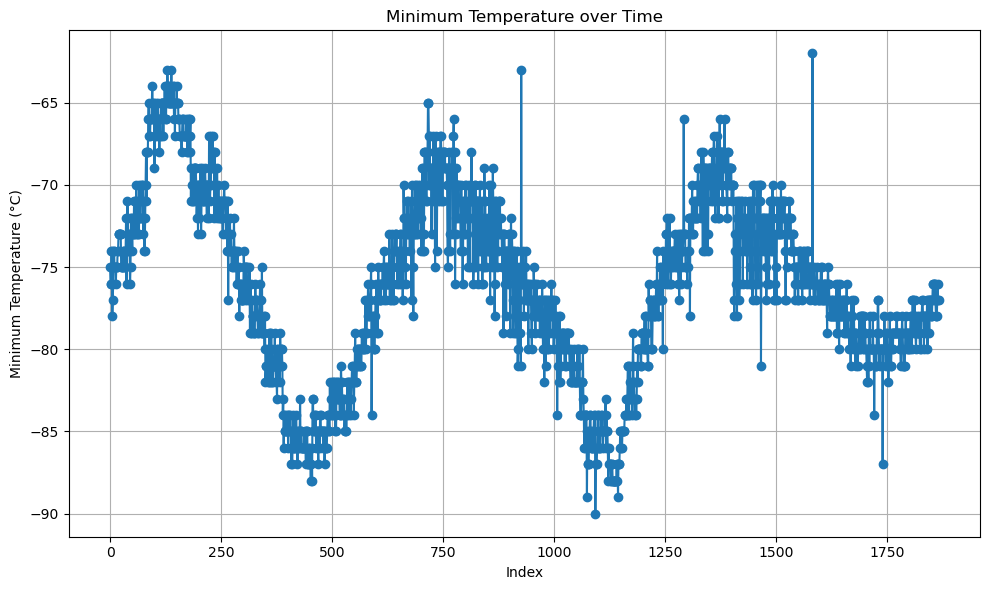

In [20]:
# Sort DataFrame by terrestrial_date
df_sorted = df.sort_values(by='terrestrial_date')
# df_sorted


# Reindex the sorted DataFrame
df_sorted = df_sorted.reset_index(drop=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_sorted.index, df_sorted['min_temp'], marker='o', linestyle='-')
plt.title('Minimum Temperature over Time')
plt.xlabel('Index')
plt.ylabel('Minimum Temperature (°C)')
# plt.xticks(df_sorted.index, df_sorted['terrestrial_date'].dt.strftime('%Y-%m-%d'), rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


In [21]:
# # 5. How many terrestrial (earth) days are there in a Martian year?

# # Sort DataFrame by terrestrial_date
# df_sorted = df.sort_values(by='terrestrial_date')

# # Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(range(len(df_sorted)), df_sorted['min_temp'], marker='o', linestyle='-')
# plt.title('Minimum Temperature over Time')
# plt.xlabel('Sequence')
# plt.ylabel('Minimum Temperature (°C)')
# plt.xticks(range(len(df_sorted)), df_sorted['terrestrial_date'].dt.strftime('%Y-%m-%d'), rotation=45)
# plt.grid(True)
# plt.tight_layout()

# plt.show()


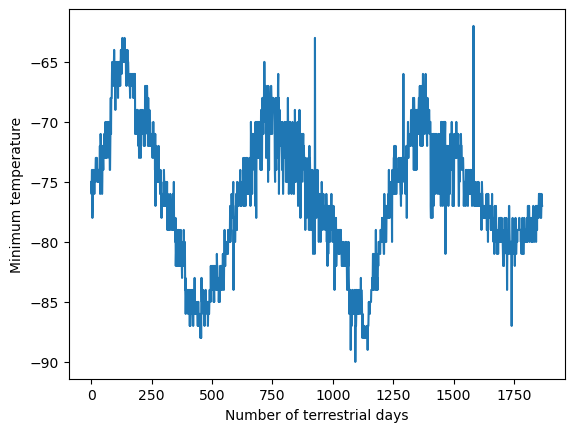

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [22]:
# Write the data to a CSV

# Define the file path where you want to save the CSV
file_path = 'Mars_Weather.csv'

# Write DataFrame to CSV
df.to_csv(file_path, index=False)  # Set index=False to omit writing row indices

print(f"DataFrame successfully written to {file_path}")


DataFrame successfully written to Mars_Weather.csv


In [23]:
browser.quit()